In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
# read from csv and save corresponding column data to variables
df = pd.read_csv('process_error.csv')
# transfer unit to meter
y = df.y
x = df.x
act_dist = df.act_dist
l = len(y)

In [16]:
x.head(10)

0    4.076
1    4.064
2    4.055
3    4.021
4    4.019
5    4.035
6    4.053
7    4.018
8    4.046
9    4.062
Name: x, dtype: float64

In [17]:
# ground truth y
expected_y = pd.Series([2.435] * l)
expected_x = pd.Series([4.045] * l)

In [33]:
rmse_y1 = mean_squared_error(y, expected_y)
rmse_x1 = mean_squared_error(x, expected_x)
rmse_net = math.sqrt(rmse_x1 ** 2 + rmse_y1 ** 2)

In [34]:
rmse_y1

0.0009678000000000042

In [35]:
rmse_x1

0.0005020700000000012

In [36]:
rmse_net

0.001090280296483436

In [37]:
x.value_counts()

4.055    5
4.045    4
4.053    4
4.065    3
4.035    3
4.068    3
4.062    3
4.058    3
4.044    3
4.007    3
4.069    2
4.060    2
4.018    2
4.056    2
4.051    2
4.061    2
4.063    2
4.024    2
4.059    2
4.073    2
4.064    2
4.038    2
4.049    2
4.050    2
4.052    2
4.030    2
4.057    2
4.042    2
4.067    1
3.990    1
4.047    1
4.039    1
4.040    1
3.985    1
4.046    1
4.019    1
4.081    1
4.086    1
4.082    1
4.070    1
3.992    1
3.998    1
4.013    1
4.076    1
4.072    1
4.012    1
4.028    1
4.025    1
4.066    1
4.011    1
4.027    1
4.071    1
4.029    1
4.023    1
4.043    1
4.021    1
3.988    1
4.000    1
Name: x, dtype: int64

In [18]:
x.describe()

count    100.000000
mean       4.045630
std        0.022511
min        3.985000
25%        4.033750
50%        4.051500
75%        4.062000
max        4.086000
Name: x, dtype: float64

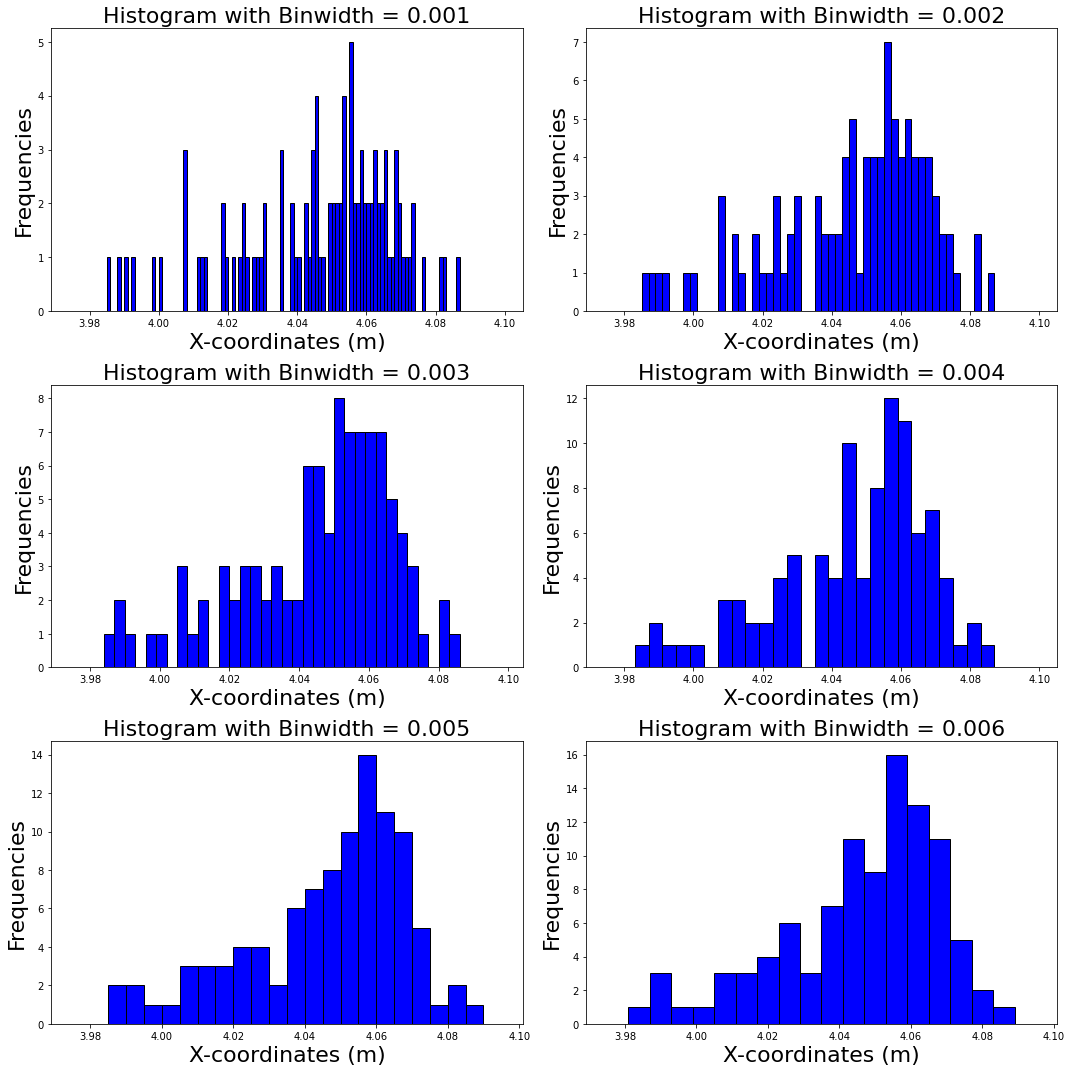

In [3]:
plt.figure(figsize=(15, 15))
for i, binwidth in enumerate([0.001,0.002,0.003,0.004,0.005,0.006]):    
    bin_values = np.arange(start=3.975, stop=4.1, step=binwidth)
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    # Draw the plot
    ax.hist(x, bins = bin_values,
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %.3f' % binwidth, size = 22)
    ax.set_xlabel('X-coordinates (m)', size = 22)
    ax.set_ylabel('Frequencies', size= 22)

plt.tight_layout()
plt.show()
# plt.savefig('Histograms.jpg', bbox_inches='tight', dpi=100)

In [6]:
min(act_dist)

1.9363346818151

In [7]:
max(act_dist)

2.03700883650513

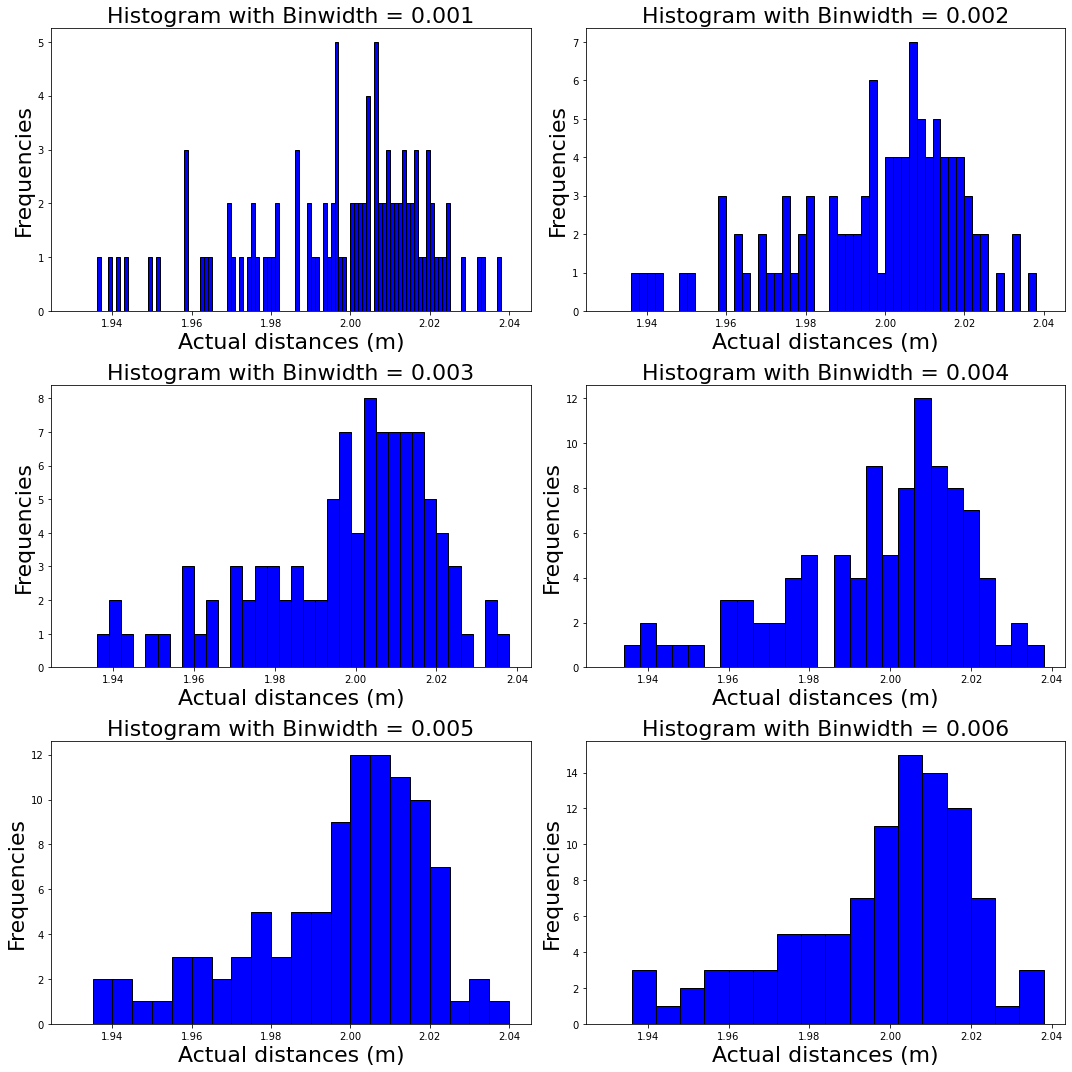

In [11]:
plt.figure(figsize=(15, 15))
for i, binwidth in enumerate([0.001,0.002,0.003,0.004,0.005,0.006]):    
    bin_values = np.arange(start=1.93, stop=2.04, step=binwidth)
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    # Draw the plot
    ax.hist(act_dist, bins = bin_values,
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %.3f' % binwidth, size = 22)
    ax.set_xlabel('Actual distances (m)', size = 22)
    ax.set_ylabel('Frequencies', size= 22)

plt.tight_layout()
plt.show()
# plt.savefig('act_dist.jpg', bbox_inches='tight', dpi=100)

From above histagrams we can see, smaller binwidths can make the histagram cluttered and bigger binwidths may make you ignore the nuances in the data, which we should always balance.

In [63]:
bin_values = np.arange(start=3.975, stop=4.1, step=0.005)

/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mingze/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


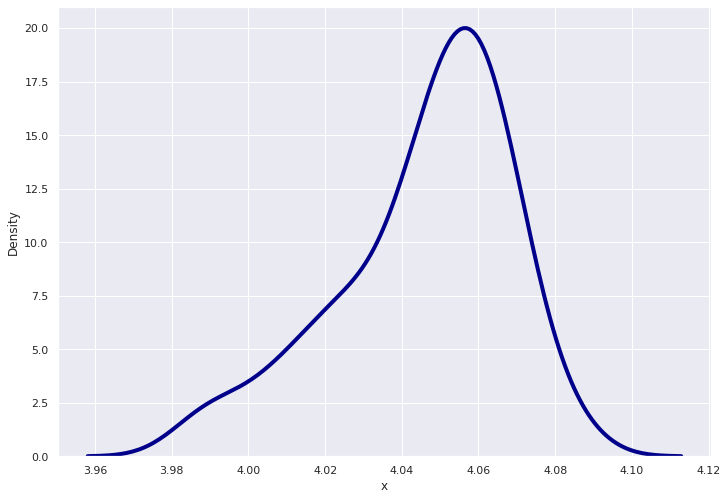

In [27]:
# a4_dims = (11.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Density Plot and Histogram of x
# sns.distplot(subset['arr_delay'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = airline)
# 'shade': True can be used to compare multiple density plot
# rug=True , for showing all detailed data
sns_plot = sns.distplot(x, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


/home/mingze/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


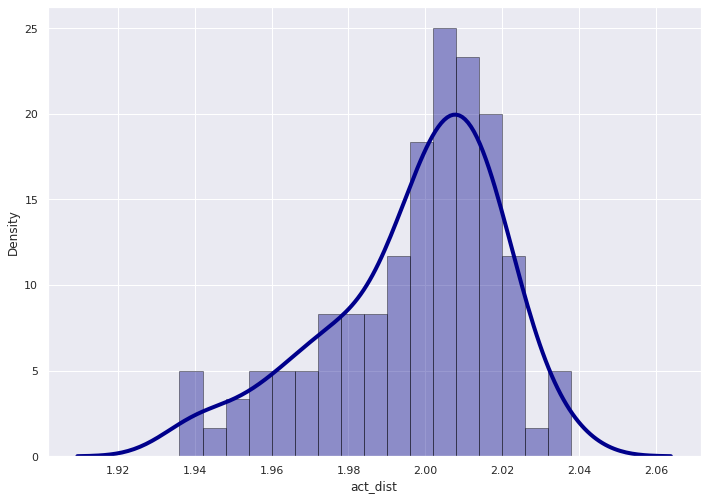

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
# Density Plot and Histogram of act_dist
# sns.distplot(subset['arr_delay'], hist = False, kde = True,
#                  kde_kws = {'shade': True, 'linewidth': 3}, 
#                   label = airline)
# 'shade': True can be used to compare multiple density plot
# rug=True , for showing all detailed data
sns_plot = sns.distplot(act_dist, hist=True, kde=True, 
             bins=bin_values, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [23]:
x

0     4.076
1     4.064
2     4.055
3     4.021
4     4.019
      ...  
95    4.030
96    4.068
97    4.066
98    4.012
99    4.007
Name: x, Length: 100, dtype: float64

Text(0, 0.5, 'Frequencies')

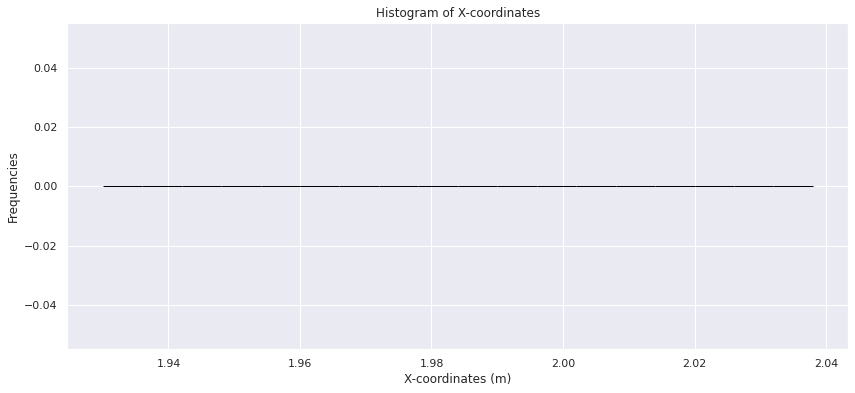

In [15]:
# figsize=[14,6]
plt.figure(figsize=(14, 6))
plt.hist(x, bins=bin_values, edgecolor='black')
plt.title('Histogram of X-coordinates')
plt.xlabel('X-coordinates (m)')
plt.ylabel('Frequencies')

<AxesSubplot:ylabel='Frequency'>

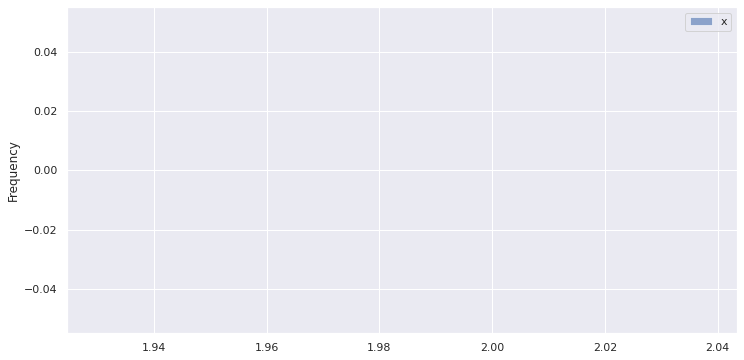

In [19]:
# alpha for transparency
x.plot(kind='hist', bins=bin_values, figsize=[12,6], alpha=.6, legend=True)

<AxesSubplot:>

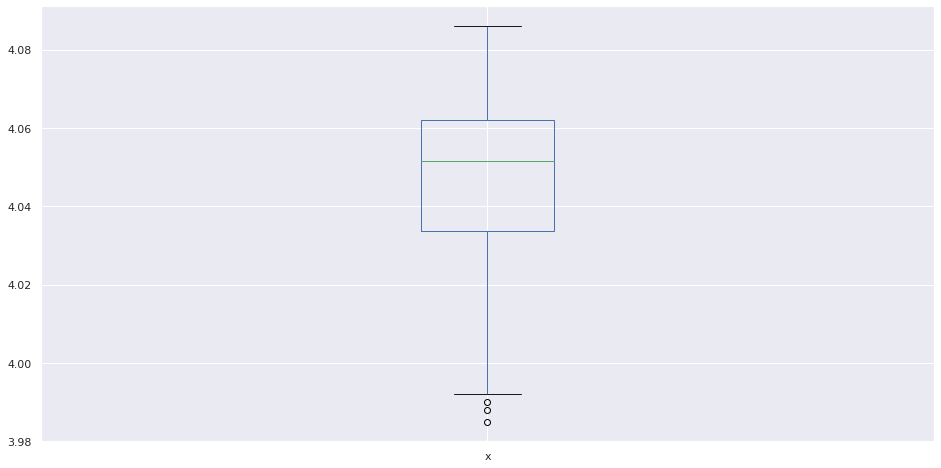

In [20]:
x.plot(kind='box', figsize=[16,8])